In [1]:
import numpy as np
import matplotlib.pyplot as mp

%matplotlib inline 

In [2]:
working_dir = '/Volumes/Annie/CRRP/'


In [5]:
dtype = np.dtype([('name', 'S10'), ('period', float), ('type', 'S6'), ('dist', float), ('U', float), ('Uer', float), 
                    ('Uamp', float), ('B', float), ('Ber', float), ('Bamp', float), ('V', float),
                    ('Ver', float), ('Vamp', float), ('R', float), ('Rer', float), ('Ramp', float),
                    ('I', float), ('Ier', float), ('Iamp', float), ('J', float), ('Jer', float),
                    ('Jamp', float), ('H', float), ('Her', float), ('Hamp', float), ('K', float),
                    ('Ker', float), ('Kamp', float), ('3.6', float), ('3.6er', float), ('3.6amp', float),
                    ('4.5', float), ('4.5er', float), ('4.5amp', float)])

N3201data = np.loadtxt(working_dir+'NGC3201/RRL-avg-mags.txt', dtype=dtype)
N7078data = np.loadtxt(working_dir+'NGC7078/RRL-avg-mags.txt', dtype=dtype)
N6402data = np.loadtxt(working_dir+'NGC6402/RRL-avg-mags.txt', dtype=dtype)
N5904data = np.loadtxt(working_dir+'NGC5904/RRL-avg-mags.txt', dtype=dtype)
N6121data = np.loadtxt(working_dir+'NGC6121/RRL-avg-mags.txt', dtype=dtype)

N3201logP = np.log10(N3201data['period'])
N7078logP = np.log10(N7078data['period'])
N6402logP = np.log10(N6402data['period'])
N5904logP = np.log10(N5904data['period'])
N6121logP = np.log10(N6121data['period'])
N3201logP[N3201data['type'] == 'RR1'] += 0.127
N7078logP[N7078data['type'] == 'RR1'] += 0.127
N6402logP[N6402data['type'] == 'RR1'] += 0.127
N5904logP[N5904data['type'] == 'RR1'] += 0.127
N6121logP[N6121data['type'] == 'RR1'] += 0.127

# select only stars used in PL 
M4_3p6_use = np.array(['V01', 'V02', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10', 'V12', 'V14', 'V15',
                       'V16', 'V18', 'V19', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
                       'V37', 'V38', 'V39', 'V40', 'V41', 'V49', 'V52', 'V61', 'C01'])
M4_4p5_use = np.array(['V01', 'V02', 'V03', 'V05', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12', 'V14', 'V16',
                       'V18', 'V22', 'V23', 'V24', 'V25', 'V26', 'V28', 'V36', 'V37', 'V38', 'V39', 'V40', 
                       'V41', 'V49', 'V52', 'V61', 'C01'])
N3201_3p6_use = np.array(['V1', 'V10', 'V100', 'V12', 'V13', 'V14', 'V17', 'V18', 'V19', 'V2', 'V20', 'V21',
 'V22', 'V23', 'V25', 'V26', 'V28', 'V29', 'V3', 'V31', 'V32', 'V34', 'V35', 'V37',
 'V4', 'V40', 'V41', 'V42', 'V44', 'V47', 'V48', 'V49', 'V5', 'V51', 'V56', 'V57',
 'V58', 'V6', 'V7', 'V71', 'V77', 'V78', 'V8', 'V80', 'V83', 'V98'])
N3201_4p5_use = ['V1', 'V10', 'V100', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V19', 'V2', 'V20',
 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V29', 'V3', 'V31', 'V32', 'V35', 'V37',
 'V39', 'V4', 'V40', 'V42', 'V43', 'V44', 'V47', 'V48', 'V49', 'V5', 'V51', 'V57',
 'V59', 'V6', 'V67', 'V71', 'V73', 'V76', 'V78', 'V8', 'V80', 'V83', 'V9', 'V98']
M5_3p6_use = ['V1', 'V11', 'V114', 'V12', 'V130', 'V14', 'V16', 'V161', 'V17', 'V26', 'V27', 'V30',
 'V33', 'V34', 'V36', 'V38', 'V4', 'V40', 'V41', 'V45', 'V5', 'V52', 'V54', 'V55',
 'V56', 'V59', 'V64', 'V65', 'V7', 'V78', 'V80', 'V81', 'V82', 'V83', 'V85', 'V87',
 'V89', 'V90', 'V91', 'V95', 'V96']
M5_4p5_use = ['V1', 'V11', 'V114', 'V115', 'V12', 'V129', 'V130', 'V139', 'V14', 'V16', 'V161',
 'V17', 'V26', 'V27', 'V30', 'V33', 'V34', 'V36', 'V38', 'V4', 'V40', 'V41', 'V44',
 'V45', 'V47', 'V5', 'V54', 'V55', 'V56', 'V57', 'V59', 'V64', 'V65', 'V7', 'V80',
 'V81', 'V86', 'V87', 'V89', 'V90', 'V91', 'V96', 'V97']
M15_3p6_use = ['NV6', 'V10', 'V102=NV10', 'V11', 'V12', 'V13', 'V16', 'V19', 'V2', 'V20', 'V21',
 'V22', 'V23', 'V24', 'V25', 'V3', 'V32', 'V35', 'V36', 'V37', 'V38', 'V4', 'V40',
 'V42', 'V44', 'V45', 'V46=V112', 'V48', 'V5', 'V50', 'V52', 'V56', 'V6', 'V60', 'V63',
 'V65', 'V66', 'V74', 'V8', 'V9', 'V97', 'V99']
M15_4p5_use = ['NV6', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V18', 'V19', 'V2', 'V20',
 'V21', 'V23', 'V24', 'V25', 'V3', 'V35', 'V36', 'V37', 'V38', 'V40', 'V41', 'V42',
 'V44', 'V45', 'V46=V112', 'V48', 'V49', 'V5', 'V50', 'V52', 'V55', 'V56', 'V6', 'V60',
 'V65', 'V66', 'V7', 'V74', 'V8', 'V9', 'V97', 'V99']
M14_3p6_use = ['V10', 'V110', 'V111', 'V118', 'V13', 'V130', 'V133', 'V14', 'V140', 'V15', 'V150',
               'V16', 'V160', 'V18', 'V19', 'V20', 'V22', 'V23', 'V24', 'V3', 'V32', 'V33', 'V34',
 'V39', 'V4', 'V42', 'V43', 'V44', 'V46', 'V48', 'V49', 'V5', 'V57', 'V58', 'V59',
 'V75', 'V77', 'V78', 'V8', 'V9', 'V98']
M14_4p5_use = ['V10', 'V106', 'V110', 'V118', 'V13', 'V130', 'V14', 'V140', 'V141', 'V143', 'V15',
 'V150', 'V19', 'V22', 'V24', 'V25', 'V3', 'V31', 'V32', 'V33', 'V34', 'V42', 'V43',
 'V44', 'V47', 'V59', 'V60', 'V70', 'V75', 'V77', 'V8', 'V80', 'V88', 'V9']

N3201good = (N3201data['3.6'] < 90) & (np.in1d(N3201data['name'], N3201_3p6_use) == True)
N7078good = (N7078data['3.6'] < 90) & (np.in1d(N7078data['name'], M15_3p6_use) == True)
N6402good = (N6402data['3.6'] < 90) & (np.in1d(N6402data['name'], M14_3p6_use) == True)
N5904good = (N5904data['3.6'] < 90) & (np.in1d(N5904data['name'], M5_3p6_use) == True)
N6121good = (N6121data['3.6'] < 90) & (np.in1d(N6121data['name'], M4_3p6_use) == True)

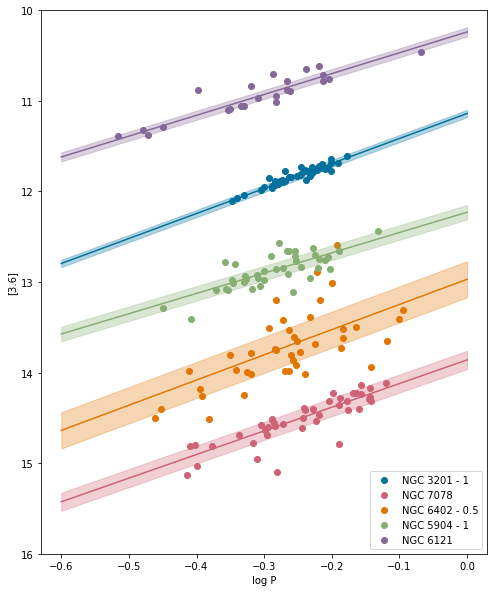

In [6]:
x = np.array([-0.6, 0])
N3201y = 12.14 -2.76*x
N7078y = 13.86 - 2.61*x
N6402y = 13.47 - 2.78*x
N5904y = 13.23 - 2.24*x
N6121y = 10.24 - 2.30*x
N3201sig = 0.04
N7078sig = 0.10
N6402sig = 0.20
N5904sig = 0.08
N6121sig = 0.05

N3201ext = 0.24*3.1*0.066
N7078ext = 0.10*3.1*0.066
N6402ext = 0.60*3.1*0.066
N5904ext = 0.03*3.1*0.066
N6121ext = 0.35 *3.1*0.066

fig = mp.figure(figsize=(8,10))
ax1 = fig.add_subplot(111)
ax1.scatter(N3201logP[N3201good], N3201data['3.6'][N3201good]-N3201ext-1, label='NGC 3201 - 1', color='xkcd:ocean blue')
ax1.plot(x, N3201y-1, color='xkcd:ocean blue')
ax1.fill_between(x, N3201y-N3201sig-1, N3201y+N3201sig-1, alpha=0.3, color='xkcd:ocean blue')
ax1.scatter(N7078logP[N7078good], N7078data['3.6'][N7078good]-N7078ext, label='NGC 7078', color='xkcd:rose')
ax1.plot(x, N7078y, color='xkcd:rose')
ax1.fill_between(x, N7078y-N7078sig, N7078y+N7078sig, alpha=0.3, color='xkcd:rose')
ax1.scatter(N6402logP[N6402good], N6402data['3.6'][N6402good]-N6402ext-0.5, label='NGC 6402 - 0.5', color='xkcd:pumpkin')
ax1.plot(x, N6402y-0.5, color='xkcd:pumpkin')
ax1.fill_between(x, N6402y-N6402sig-0.5, N6402y+N6402sig-0.5, alpha=0.3, color='xkcd:pumpkin')
ax1.scatter(N5904logP[N5904good], N5904data['3.6'][N5904good]-N5904ext-1, label='NGC 5904 - 1', color='xkcd:sage')
ax1.plot(x, N5904y-1, color='xkcd:sage')
ax1.fill_between(x, N5904y-N5904sig-1, N5904y+N5904sig-1, alpha=0.3, color='xkcd:sage')
ax1.scatter(N6121logP[N6121good], N6121data['3.6'][N6121good]-N6121ext, label='NGC 6121', color='xkcd:dark lavender')
ax1.plot(x, N6121y, color='xkcd:dark lavender')
ax1.fill_between(x, N6121y-N6121sig, N6121y+N6121sig, alpha=0.3, color='xkcd:dark lavender')

ax1.legend(loc='lower right')
ax1.set_ylim((16,10))
ax1.set_xlabel('log P')
ax1.set_ylabel('[3.6]')
mp.rcParams.update({'font.size': 12})
mp.savefig(working_dir+'pls-all.pdf', format='pdf')